In [1]:
import numpy as np
import pandas as pd

# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 7

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv('pima_indians_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


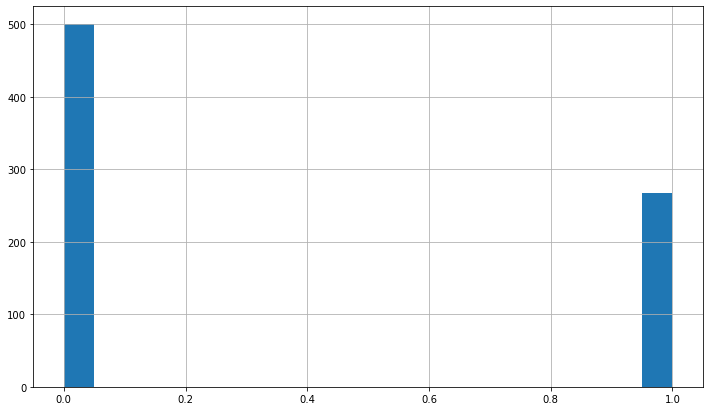

In [5]:
df['Outcome'].hist(bins=20)

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

In [7]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Manual Network

In [9]:
theta = tf.Variable(tf.random_normal([X.shape[1], 1], mean=0, stddev=1))
theta

<tf.Variable 'Variable:0' shape=(8, 1) dtype=float32_ref>

In [10]:
x_ph = tf.placeholder(dtype=tf.float32, shape=(None, X.shape[1]))
y_ph = tf.placeholder(dtype=tf.float32, shape=(None, y.shape[1]))

In [11]:
z = tf.matmul(x_ph, theta)
fz = tf.sigmoid(z)

In [12]:
cost = -y_ph*tf.log(fz) - (1-y_ph)*tf.log(1-fz)
error = tf.reduce_sum(cost)

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [14]:
init = tf.global_variables_initializer()

In [15]:
with tf.Session() as sess:
    sess.run(init)

    batches = 1000
    for i in range(batches):
        # randomly selecting 8(batch-size) tuples
        rand_int = np.random.randint(X_train.shape[0], size=8)
        feed = {x_ph:X_train[rand_int], y_ph:y_train[rand_int]}
        
        sess.run(train, feed_dict=feed)
        print(sess.run(error, feed_dict=feed))

    # threshold is set to 0.8
    y_pred = sess.run(tf.cast(tf.greater_equal(tf.sigmoid(tf.matmul(X_test.astype('float32'), theta)), 0.8), dtype=tf.int32))

10.545343
5.2589617
5.8657293
10.736052
8.823615
7.5131674
11.301947
8.425829
12.497282
8.363831
5.9022465
10.909737
8.253562
3.8166423
5.250079
10.459311
8.260506
11.793846
5.9153614
6.8332977
7.551122
7.824856
10.410753
9.322756
8.257383
7.571778
6.2888002
16.37415
11.428879
7.239782
7.646655
5.1161175
4.69497
7.6525936
7.7018223
8.555194
8.224369
10.5289135
10.610802
11.80027
6.9677925
7.091909
7.377906
6.195903
14.951314
5.1136255
4.648444
7.060074
6.000823
12.154228
5.5328813
10.137159
3.759804
6.8231883
8.230103
7.094117
6.3688116
10.113406
9.965132
11.446362
7.330816
4.6577883
8.143071
6.246614
8.397976
6.236754
11.339417
5.131246
7.7082644
9.883568
7.535593
6.3830366
10.396787
6.9427347
4.194928
13.126133
5.285283
9.539469
5.489004
5.4272847
4.374152
9.311865
12.0013275
4.0091915
7.5853987
8.3351345
3.7006726
5.6870694
9.710182
5.9348493
6.0076632
3.7697225
6.3340735
8.40856
8.244101
6.6375027
5.8244843
8.243286
4.8536882
10.288839
5.093565
4.3172326
4.506749
10.73365
10.831947

3.7297964
4.067672
4.3886228
3.9511435
5.04132
5.9008007
2.726079
5.086571
5.825995
2.4379804
3.4556887
4.4086437
3.635821
5.906428
5.3949575
2.8729658
4.524829
2.6107354
3.773308
3.1636333
4.107275
2.5746322
4.829147
5.5738077
2.5032146
5.139684
2.5490127
4.205502
3.9914844
5.9404125
2.8693905
3.8357048
3.3016787
4.6324415
6.585129
4.0745916
3.5359712
4.6151648
3.6850216
7.043976


In [16]:
pd.concat([pd.DataFrame(y_pred, columns=['Predicted']), pd.DataFrame(y_test, columns=['True'])], axis=1)

,Predicted,True
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
72,0,0
73,1,0
74,0,0
75,0,0


In [17]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[52,  6],
       [12,  7]], dtype=int64)

In [18]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7662337662337663